## Jupyter notebook Lars Rook & Sem van der Hoeven

# Week 4

## 4.1: ZTDL 1 - First Deep Learning Model
We hebben bij elk code blok comments gezet die uitleggen wat de code doet.

In [ ]:
import numpy as np # import the numpy library and assign the name np to it

# magic function that sets the backend of matplotlib to the inline backend
# source: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline 
import matplotlib.pyplot as plt # import the matplotlib.pyplot and assign the name plt to it

In [ ]:
from sklearn.datasets import make_circles # import the make_circles module from the sklearn.datasets module

In [ ]:
"""
roept de make_circles functie aan van de sklearn.datasets module
de make_circles functie maakt een cirkel met een kleinere cirkel hier binnen in.
- de n_samples staat voor hoeveel points gegenereerd moeten worden.
- de noise variabele staat voor hoeveel noise eraan toegeoegd moet worden
- de factor staat voor de schaling tussen de binnenste en buitenste cirkel
- de random_state variabele wordt gebruikt voor het genereren van een random nummer die gebruikt wordt voor het shufflen van de dataset en de noise.
"""

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [ ]:
# X bevat de gegenereerde samples van de make_circles methode.

X

In [ ]:
# aangezien x de array of shape [n_samples, 2] bevat, geeft dit de gegeven aantal samples en 2.
X.shape

In [ ]:
"""
Hier wordt met matplotlib een grafiek van de samples getekend.
allereerst wordt er een figuur aangemaakt, daarna worden de waarden die zijn gegenereerd getekend op deze figuur.
Hierna worden de limits van de x en y assen gezet.
Daarna wordt de legenda aangemaakt, hierbij zijn de bolletjes een 0 en de kruisjes een 1.
Als laatst wordt de titel van de figuur aangemaakt.
"""

plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [ ]:
# importeer modules van tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# Maak een sequentieel model aan
model = Sequential()

In [ ]:
# voeg een laag aan het model toe met 4 output neurons en 2 input neurons. Deze laag gebruikt de hyperbolic tangent activation functie.
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [ ]:
# voeg nog een laag toe met 1 output neuron. Deze laag gebruikt de Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
"""
compile configureert het model voor het trainen.
- als optimizer wordt de gradient descent optimizer gebruikt met een learning rate van 0.5
- als loss wordt binary cross entropy gebruikt. 
- bij de metrics parameter wordt een lijst van attributen gezet waarop het model wordt geëvalueerd. In dit geval is het alleen de nauwkeurigheid
""" 
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""
fit traint het model voor het aantal gegeven epochs.
- X staat voor de input samples.
- y staat voor de target data (tensors)
- epochs staat voor hoe vaak het model getrained wordt.
"""
model.fit(X, y, epochs=20)

In [ ]:
"""
met de linspace functies worden nummers gegenereerd over een gelijk interval.
met de meshgrid functies worden coordinate matrices gemaakt van coordinate vectors.
met de c_ functie wordt een matrix gemaakt van de genenereerde arrays.
met de predict functie worden output predictions gegenereerd voor de input samples.
met de reshape functie wordt de shape aangepast naar die van de meshgrid.
"""
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

In [ ]:
ab

In [ ]:
"""
Hier wordt met matplotlib een grafiek van de samples getekend.
allereerst wordt er een figuur aangemaakt
Daarna wordt de contour getekend aan de hand van de output van het model.
Daarna worden de waarden die zijn gegenereerd getekend op deze figuur.
Hierna worden de limits van de x en y assen gezet.
Daarna wordt de legenda aangemaakt, hierbij zijn de bolletjes een 0 en de kruisjes een 1.
Als laatst wordt de titel van de figuur aangemaakt.
"""
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

## 4.2 : ZTDL 2 - Data

a. we hebben allebei het notebook bestudeerd.
b. we hebben een spreadsheet gevonden over heart attack analysis and predictions.
c. Hieronder zijn een aantal technieken en plots te zien die wij op de data hebben uitgevoerd. Om het beter te begrijpen hebben wij allebei samen de technieken en plots uitgevoerd.

### Standaard info
We hebben eerst de standaard gegevens van de dataset verkend.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/heart.csv')

In [ ]:
type(df)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

### indexing
We zullen nu verschillende items in de dataset indexeren

In [ ]:
# het 10de element ophalen uit de dataset
df.iloc[10]

In [ ]:
# de age, sex en oldpeak van de eerste 9 elementen ophalen
df.loc[0:8,['age','sex','oldpeak']]

In [ ]:
# de head opvragen van de elementen met het sex attribuut
df['sex'].head()

In [ ]:
# unieke element van sex ophalen
df['sex'].unique()

In [ ]:
# sorteer de values van attribuut age op optellende manier
df.sort_values('age', ascending = True)

In [ ]:
dfplot = df[['age','chol']]
dfplot.plot(title='age chol relation')

In [ ]:
amountMale = df['sex'] > 0 # assuming male = 1
piecounts = amountMale.value_counts()
piecounts

In [ ]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.12],
               labels=['male', 'female'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=60,
               fontsize=16);

## 4.3 : ZTDL 3 – Machine Learning

### Linear regression
Deze code blokken zijn nodig als setup voor de linear regression met keras
We hebben gekozen voor een dataset die gebruikt kan worden voor linear regression. De dataset heeft geen bepaalde betekenis.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#  read the csv file into the df variable
df = pd.read_csv('../data/test.csv')

In [ ]:
# check out what is in the first few lines
df.head()

In [ ]:
# plot the points in the dataset
df.plot(kind='scatter',
        x='x',
        y='y',
        title='x and y in the dataset')

In [ ]:
# plot the points again
df.plot(kind='scatter',
        x='x',
        y='y',
        title='y and x in the data set')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [ ]:
# define a method to calculate a point for a line given the input values
def line(x, w=0, b=0):
    return x * w + b

In [ ]:
# generate evenly spaced numbers 
x = np.linspace(55, 80, 100)

In [ ]:
x

In [ ]:
# generate line points
yhat = line(x, w=0, b=0)

In [ ]:
yhat

In [ ]:
# draw the points again, now with the line
df.plot(kind='scatter',
        x='x',
        y='y',
        title='y en x in the data set')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost function

In [ ]:
# calculate the mean squared error given the input parameters.
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [ ]:
# get the x and y values from the dataset
X = df[['x']].values
y_true = df['y'].values

In [ ]:
y_true

In [ ]:
# convert the points of the y values to line points
y_pred = line(X)

In [ ]:
y_pred

In [ ]:
# calculate the mean square error for the points
mean_squared_error(y_true, y_pred.ravel())

### Linear regression with keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
model = Sequential()

In [ ]:
# make a model with 1 layer, 1 output node and 1 input node
model.add(Dense(1, input_shape=(1,)))

In [ ]:
model.summary()

In [ ]:
# get the model ready for training
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [ ]:
# start training the model for 40 epochs
model.fit(X, y_true, epochs=40)

In [ ]:
y_pred = model.predict(X)

In [ ]:
df.plot(kind='scatter',
        x='x',
        y='y',
        title='x and y in the dataset, with prediction')
plt.plot(X, y_pred, color='red')

In [ ]:
W, B = model.get_weights()

In [ ]:
W

In [ ]:
B

# Week 5

## Opdracht 5.1: ZTSL 4: Deep Learning Intro - shallow model

In [ ]:
"""
Opdracht 5.1 b: We hebben een schets gemaakt van hoe wij denken dat het 
model er uit zal zien. De code voor het inladen van de foto hebben wij 
gehaald uit de practicumomschrijving.

links zijn de I1 en I2 de inputs. De matrix van v11 en v12 stellen de 
weegfactoren voor. In het midden is de sigmoid activatiefunctie te zien, en
rechts is de output te zien.
"""

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../data/opdr5-1-b.png')
plt.figure(figsize(20,10))
imgplot = plt.imshow(img)


Opdracht 5.1 c
Op basis van de hoeveelheid lagen, hebben wij geconcludeerd dat het shallow model niet genoeg lagen heeft om een accurate voorstelling te doen van een gegeven aantal inputs. Dit komt omdat het shallow model maar 1 hidden layer heeft.

## Opdracht 5.2: ZTDL 4: Deep Learning Intro – deep model

In [ ]:
"""
Opdracht 5.2 b: We hebben een schets gemaakt van hoe wij denken dat het 
model er uit zal zien. De code voor het inladen van de foto hebben wij 
gehaald uit de practicumomschrijving.

Er is te zien dat het model 2 inputs heeft, de eerste laag 4 outputs heeft, 
de tweede laag 2 ouputs heeft en de 3e laag 1 output heeft. Ook is te zien
dat de eerste en 2e laag de tanh functie als activatiefunctie hebben, en de
derde laag de sigmoid functie als activatiefunctie gebruikt. De matrices met
de v, w en z waarden stellen de weegfactoren voor.
Dit netwerk heeft 3 lagen.

(om de foto beter te zien is het aan te raden om in te zoomen)
"""

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../data/opdr5-2-b.png')
plt.figure(figsize(20,10))
imgplot = plt.imshow(img)

5.2.c: De optimizer die wordt toegepast is de _binary crossentropy_ optimizer.
**wat is de functie van een optimizer:** De weegfactoren aanpassen zodat de loss function geminimaliseerd wordt. [Handige bron over optimizers](https://medium.datadriveninvestor.com/overview-of-different-optimizers-for-neural-networks-e0ed119440c3)

5.2.d: Uit de resultaten van de tests is te zien dat de accuracy van de trainingsset 0.999 (99.9%) is, en van de testset 1.000 (100%). Dit geeft aan dat het model heel goed is in het classificeren van de gevraagde features. De classificatie is dus erg goed.

5.2.e: Hier is geen sprake van overfitting, aangezien de berekende lijn 
(het witte gedeelte tussen de rode en blauwe delen) de scheiding volgt van de twee verschillende punten. Hierbij zitten er dus geen punten tussen die over deze scheiding zitten.

## Opdracht 5.3: ZTDL 4: Deep Learning Intro – Iris

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('../data/iris.csv')

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [ ]:
df.head()

In [ ]:
X = df.drop('species', axis=1)
X.head()

In [ ]:
target_names = df['species'].unique()
target_names

In [ ]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

In [ ]:
y= df['species'].map(target_dict)
y.head()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat = to_categorical(y)

In [ ]:
y_cat[:10]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_class, y_pred_class))

In [ ]:
confusion_matrix(y_test_class, y_pred_class)

In [ ]:
"""
Opdracht 5.3 b: We hebben een schets gemaakt van hoe wij denken dat het 
model er uit zal zien. De code voor het inladen van de foto hebben wij 
gehaald uit de practicumomschrijving.

Er is te zien dat dit netwerk maar 1 laag heeft, links zijn de inputs te 
zien met rechts de activatie functies en de outputs.
"""

img = mpimg.imread('../data/opdr5-3-b.png')
plt.figure(figsize(20,10))
imgplot = plt.imshow(img)

5.3.c: Hier wordt voor de softmax activation function gekozen omdat bij dit netwerk sprake is van meerdere klassen ('setosa', 'versicolor', 'virginica'). De softmax functie maakt het mogelijk om een multi-class vraagstuk op te lossen omdat het een decimale waarde geeft aan elke klasse, die representeert hoe veel het netwerk 'denkt' dat het die klasse is. De gegeven waarden aan de 3 resultaten (hoe veel het 'setosa', 'versicolor' of 'virginica' is) bij elkaar opgeteld is gelijk aan 1.0. [bron](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax)

5.3.d: de learning rate geeft aan hoe snel het model leert. [bron](https://www.jeremyjordan.me/nn-learning-rate/).
we hebben de learning rate aangepast naar verschillende waarden en gekeken wat de loss en accuracy zijn. We hebben van elke learning rate de loss en accuracy van de laatste epoch opgenomen.


|learning rate |loss  | accuracy|
--- | --- | ---
|0.1|0.2843|0.9815|
|0.5|0.1696|0.9259|
|0.8|0.1036|0.9630|
|1.0|0.1025|0.9537|


Uit deze verkregen waarden kunnen we concluderen dat een lagere learning rate zorgt voor een hogere accuracy maar ook een hogere loss. Hoe hoger de learning rate wordt, hoe minder updates worden uitgevoerd bij elke epoch, en worden de resultaten dus minder accuraat.

5.3.e: Er is hier geen sprake van overfitting. We kunnen doormiddel van te kijken naar de accuracy en loss bij elke epoch zien dat deze niet minder worden. Dit geeft aan dat er geen overfitting plaatsvindt. Ook kunnen we in de classification report zien dat het netwerk een accuracy van 0.97 heeft, wat ook aangeeft dat er geen overfitting plaatsvindt omdat dit hoog is.

5.3.f: de _precision_ geeft aan hoe precies de voorstellen van het netwerk zijn , de positieve voorspelde uitkomsten. De _recall_ geeft aan hoeveel voorgestelde resultaten ook daadwerkelijk goed waren. De _f1 score_ geeft een gemiddelde aan van de precision en de recall. ([bron](https://wiki.pathmind.com/accuracy-precision-recall-f1)).

5.3.g: Uit de scores van het classification report kunnen we concluderen dat de betrouwbaaheid van het netwerk vrij hoog is, aangezien de waarden in het classification rapport vrij hoog zijn (niet lager dan 0.95).

5.3.h: uit de confusion matrix is te zien hoe vaak het netwerk een klasse van een bepaald type heeft geïdentificeerd terwijl dit een andere klasse is, ofwel hoe vaak het netwerk "confused" was ([bron](https://machinelearningmastery.com/confusion-matrix-machine-learning/)).

5.3.i: De informatie uit de confusion matrix is van belang bij het trekken van conclusies omdat hiermee duidelijk kan worden wat voor fouten het netwerk maakt.

## Opdracht 5.4: Eenvoudig Classificatie vraagstuk

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [2]:
"""
leest de data uit van een .csv file.
"""
df = pd.read_csv('../data/Fish.csv')

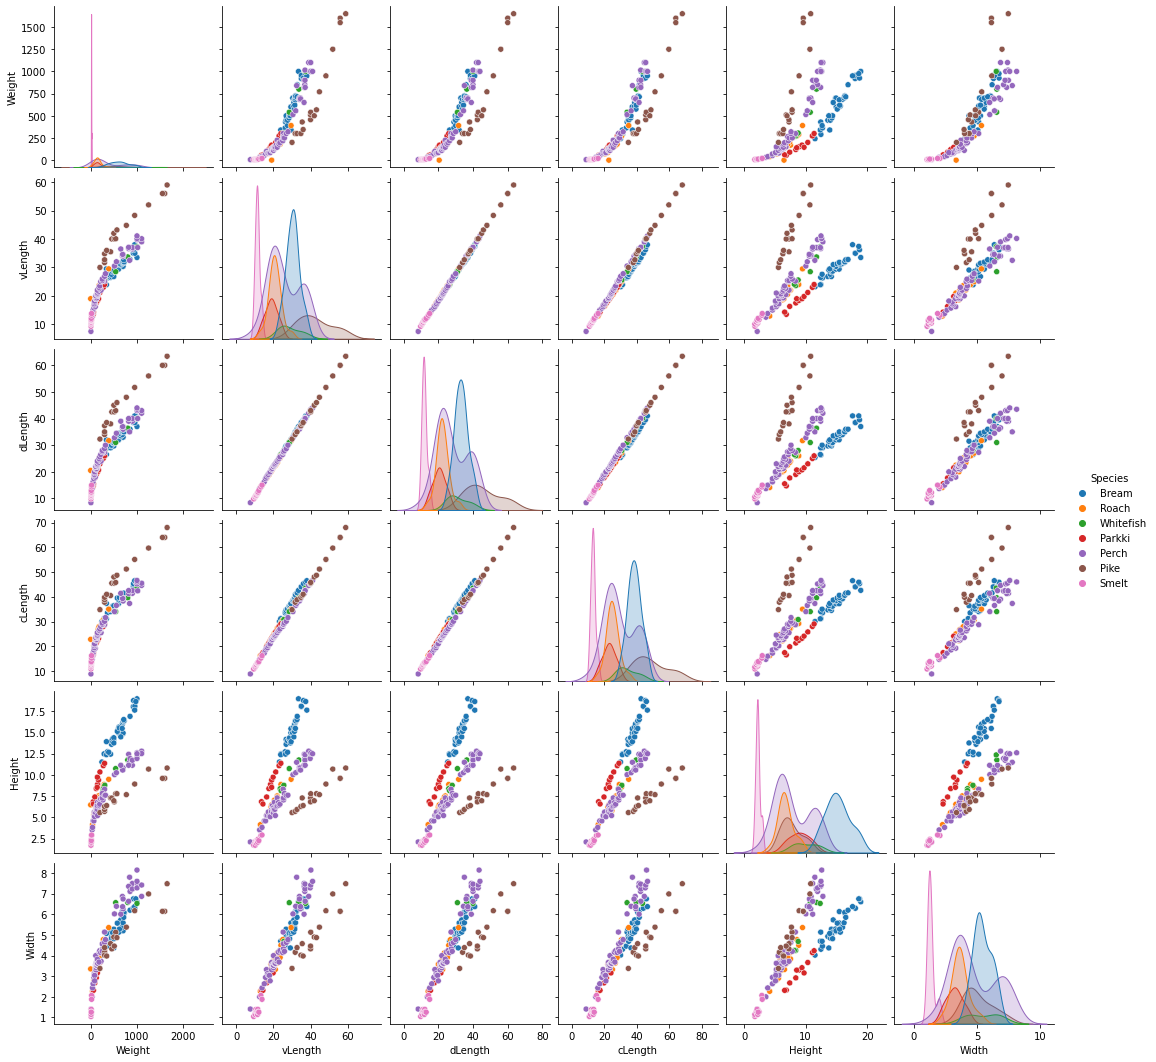

In [3]:
"""
Plot voor elke verschillende soorten species elke attribute.
Zo zijn de soorten te zien in de kolommen en de attributen 
zijn te zien in de rijen.
"""
sns.pairplot(df, hue="Species")

In [4]:
"""
Laat de eerste aantal waardes van de dataset zien.
vLength:verticale lengte van de vis.
dLength: diagonale lengte van de vis.
clength: kruisende lengte van de vis.
"""
df.head()

,Species,Weight,vLength,dLength,cLength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
"""
Haal de species kolom uit de originele dataset zodat 
alleen de attributen overblijven.
Axis=1 -> alleen de kolom weghalen.
"""
X = df.drop('Species', axis=1)
X.head()

,Weight,vLength,dLength,cLength,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
"""
Kijken wat alle target names zijn, oftewel
kijken wat voor vissoorten er zijn. 
"""
target_names = df['Species'].unique()
target_names

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
"""
Zet de verschillende vissoorten om in een enum,
zodat er gewerkt kan worden met cijfers i.p.v. namen.
"""
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'Bream': 0,
 'Roach': 1,
 'Whitefish': 2,
 'Parkki': 3,
 'Perch': 4,
 'Pike': 5,
 'Smelt': 6}

In [8]:
"""
map de namen naar getal waardes uit de enum.
Hier is te zien dat de eerste aantal waardes Breams zijn,
want deze hebben de waarde 0.
"""
y= df['Species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [9]:
"""
Zet het om naar een binaire matrix die aangeeft welke 
categorie vis het is.
"""
y_cat = to_categorical(y)

In [10]:
y_cat[:10]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
"""
split de originele dataset naar training en test waardes.
De size van de testwaardes is 20% van het originele.
"""
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [28]:
"""
Maak een sequentieel model met 1 hidden layer die 
7 outputs en 6 inputs heeft. We gebruiken softmax als 
activation function, omdat we gebruik maken van verschillende
categorieen vissen. 
Verder is er een learning_rate van 0.1, omdat na het testen
wij er achter kwamen dat dit het beste resultaat was.
Als loss gebruiken we categorical_crossentropy, omdat we 
gebruik maken van meer dan twee klassen
(in dit geval, verschillende vissen) die gerepresenteerd 
worden door getallen. En gebruiken als metrics accuracy, 
zodat we de nauwkeurigheid kunnen zien.

"""
model = Sequential()
model.add(Dense(7, input_shape=(6,), activation='softmax'))
model.compile(Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [84]:
"""
Hier word er getraint met de training waardes. Met 200 als 
het aantal epochs. 
We hebben hier ook gekozen om als validation_split 0.3 te 
kiezen. Dit betekend dat er 30% van de waardes gebruikt wordt
om te trainen. De overige worden gebruikt om te testen.
"""
model.fit(X_train, y_train, epochs=200, validation_split=0.3)

Epoch 1/200
3/3 [==============================] - 0s 17ms/step - loss: 0.5206 - accuracy: 0.9773 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0247 - accuracy: 0.9773 - val_loss: 0.0759 - val_accuracy: 0.9744
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0789 - accuracy: 0.9545 - val_loss: 0.2719 - val_accuracy: 0.9744
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3323 - accuracy: 0.9773 - val_loss: 0.2406 - val_accuracy: 0.9744
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 0.2357 - accuracy: 0.9773 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 6/200
3/3 [==============================] - 0s 7ms/step - loss: 0.2188 - accuracy: 0.9545 - val_loss: 0.0462 - val_accuracy: 0.9744
Epoch 7/200
3/3 [==============================] - 0s 7ms/step - loss: 0.8885 - accuracy: 0.9432 - val_loss: 0.2280 - val_accuracy: 0.9487
Epoch 8/200
3/3 [=========

3/3 [==============================] - 0s 6ms/step - loss: 0.3234 - accuracy: 0.9545 - val_loss: 0.0961 - val_accuracy: 0.9744
Epoch 118/200
3/3 [==============================] - 0s 7ms/step - loss: 0.4853 - accuracy: 0.9773 - val_loss: 0.2908 - val_accuracy: 0.9744
Epoch 119/200
3/3 [==============================] - 0s 8ms/step - loss: 0.4906 - accuracy: 0.9773 - val_loss: 0.0257 - val_accuracy: 0.9744
Epoch 120/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3162 - accuracy: 0.9659 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 121/200
3/3 [==============================] - 0s 7ms/step - loss: 0.2849 - accuracy: 0.9659 - val_loss: 0.0979 - val_accuracy: 0.9744
Epoch 122/200
3/3 [==============================] - 0s 7ms/step - loss: 0.3187 - accuracy: 0.9773 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 7ms/step - loss: 0.1126 - accuracy: 0.9773 - val_loss: 0.1149 - val_accuracy: 0.9231
Epoch 124/200
3/3 [========

In [85]:
"""
Hier worden waarde van de test waarde voorspelt.
"""
y_pred = model.predict(X_test)

In [86]:
"""
De eerste 5 elementen uit de lijst waar de voorspellende waardes zitten 
worden weergegeven.
"""
y_pred[:5]

array([[5.6894045e-17, 8.8579909e-25, 6.5820859e-06, 0.0000000e+00,
        9.9999344e-01, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [4.9131124e-16, 1.9639882e-07, 1.3309444e-01, 1.7775484e-13,
        8.6690539e-01, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [87]:
"""
pakt de hoogste waarde plus hun axis om weer te geven in de 
classification_report.
"""
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [88]:
"""
Hier worden de waardes in een classification_report uit geprint. We zien dat
het netwerk vrij accuraat is, alleen de recall bij categorie 2 is laag.
"""
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         2
           4       0.85      1.00      0.92        11
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3

    accuracy                           0.94        32
   macro avg       0.98      0.90      0.92        32
weighted avg       0.95      0.94      0.92        32



In [89]:
"""
Hier wordt gekeken hoe accuraat de classification is.
Een confusion_matrix is een matrix gevormd door te vergelijken met de test
waardes en de voorspelde waardes. Kijken hoeveel er goed en hoeveel er fout 
zijn voorspeld. We kunnen zien dat er 2 keer een fout gemaakt is bij 
trainwaarde 2 en testwaarde 4.
"""
confusion_matrix(y_test_class, y_pred_class)

array([[ 6,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  3]], dtype=int64)

# Week 6

## Opdracht 6.1: ZTDL 6: Convolutional Neural Networks – MNIST

In [ ]:
#maak een sequentieel model aan
model = Sequential() 

"""
Voeg een 2D convolution layer toe met 32 output filters, een kernel van 3x3
en een input shape van 28x28 grootte en 1 layer.
"""
model.add(Conv2D(32,(3,3),input_shape={28,28,1}))

"""
Voeg een maxpool2d laag toe met een size van 2x2. Deze laag pakt het grootste
element uit een 2x2 vierkant in elke laag.
"""
model.add(MaxPool2D(pool_size=(2,2)))

"""
Voeg een activation laag toe die de relu functie gebruikt. Deze functie maakt
van negatieve getallen een 0. Deze functie wordt uitgevoerd op de som van alle
waarden op de laagseizoen  onder de kernel.
"""
model.add(Activation('relu'))

"""
door een flatten laag toe te voegen worden alle lagen achter elkaar gezet
zodat deze makkelijker als input gebruikt kunnen worden voor de volgende lagen.
bron:
https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-3-flattening
"""
model.add(Flatten())


# voeg nog een relu activatie laag toe met 128.
model.add(Dense(128,activation='relu'))

"""
Voeg een activatielaag toe die de softmax functie gebruikt zodat we een
percentage van categoriën krijgen als resultaat. Deze laag heeft 10 outputs
"""
model.add(Dense(10,activation='softmax'))

"""
compileer het model met de categorical crossentropy loss function,
en de rmsprop als optimizer.
We willen de accuracy vergelijken door deze als metric mee te geven.

TODO optimizer en loss uitleggen
"""
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

## De eindopdracht

We hebben de video bekeken en hebben besloten een binaire classificatie te testen van foto's waar wij op staan. Hierbij zullen we de foto's onderverdelen en testen op of Sem of Lars op de foto staat. We hebben dus ook een dataset gemaakt met foto's van ons allebei.

In [18]:
%pylab inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [19]:
img2 = mpimg.imread('../data/imgs/training/sem/6.png')
img3 = img2[:,:,:3]
img3.shape



(614, 614, 3)

In [20]:
train = ImageDataGenerator()
validation = ImageDataGenerator()

In [28]:
train_dataset = train.flow_from_directory('../data/imgs/training',
                                         target_size=(100,100),
                                         batch_size=3,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory('../data/imgs/validation',
                                         target_size=(100,100),
                                         batch_size=3,
                                         class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [29]:
train_dataset.class_indices

{'lars': 0, 'sem': 1}

In [30]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',
                                 input_shape=(100,100,3)))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [33]:
model_ft = model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=70,
                    validation_data = validation_dataset)

Epoch 1/70
3/3 [==============================] - 1s 276ms/step - loss: 82.2974 - accuracy: 0.4444 - val_loss: 13.3483 - val_accuracy: 0.5000
Epoch 2/70
3/3 [==============================] - 1s 312ms/step - loss: 6.6176 - accuracy: 0.5714 - val_loss: 5.4361 - val_accuracy: 0.5000
Epoch 3/70
3/3 [==============================] - 0s 211ms/step - loss: 3.6514 - accuracy: 0.2857 - val_loss: 2.5961 - val_accuracy: 0.5000
Epoch 4/70
3/3 [==============================] - 0s 197ms/step - loss: 0.7532 - accuracy: 0.7778 - val_loss: 6.7440 - val_accuracy: 0.5000
Epoch 5/70
3/3 [==============================] - 1s 201ms/step - loss: 4.6713 - accuracy: 0.3333 - val_loss: 0.7503 - val_accuracy: 0.6667
Epoch 6/70
3/3 [==============================] - 1s 240ms/step - loss: 0.3825 - accuracy: 0.7778 - val_loss: 0.7198 - val_accuracy: 0.6667
Epoch 7/70
3/3 [==============================] - 1s 194ms/step - loss: 0.4124 - accuracy: 0.8889 - val_loss: 1.1321 - val_accuracy: 0.7000
Epoch 8/70
3/3 [==

3/3 [==============================] - 0s 205ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.5420 - val_accuracy: 0.7667
Epoch 60/70
3/3 [==============================] - 0s 206ms/step - loss: 1.2631 - accuracy: 0.6667 - val_loss: 3.3133 - val_accuracy: 0.8000
Epoch 61/70
3/3 [==============================] - 0s 208ms/step - loss: 1.3712 - accuracy: 0.7778 - val_loss: 4.3861 - val_accuracy: 0.5333
Epoch 62/70
3/3 [==============================] - 1s 287ms/step - loss: 1.8501 - accuracy: 0.7778 - val_loss: 1.1267 - val_accuracy: 0.7333
Epoch 63/70
3/3 [==============================] - 1s 220ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.1329 - val_accuracy: 0.8000
Epoch 64/70
3/3 [==============================] - 1s 225ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.2015 - val_accuracy: 0.7333
Epoch 65/70
3/3 [==============================] - 1s 216ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.4127 - val_accuracy: 0.7667
Epoch 66/70
3/3 [========

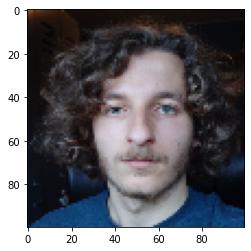

sem


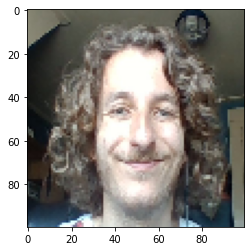

sem


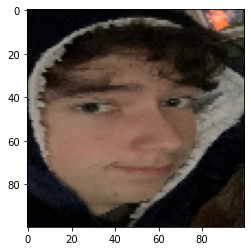

lars


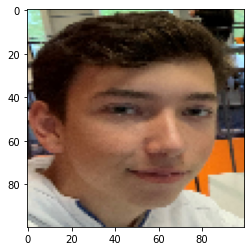

lars


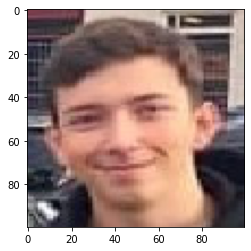

lars


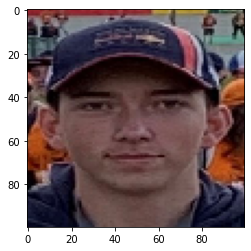

lars


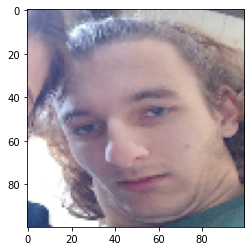

sem


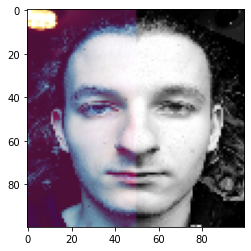

lars


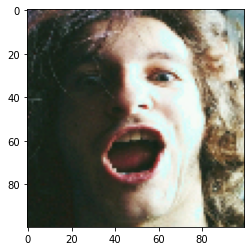

sem


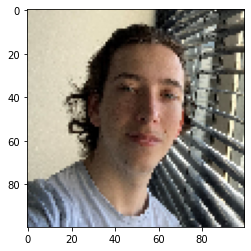

lars


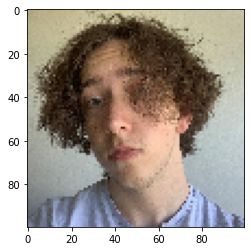

lars


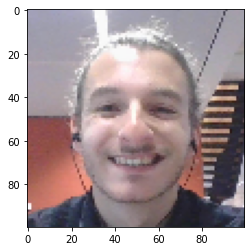

sem


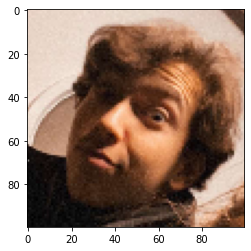

sem


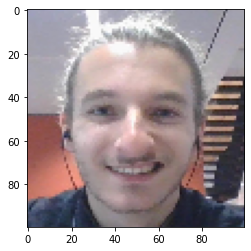

sem


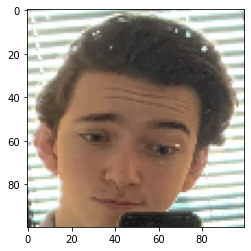

lars


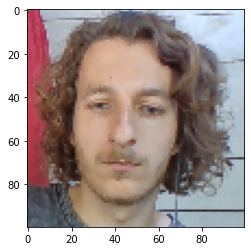

sem


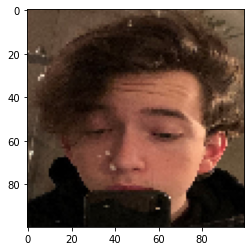

lars


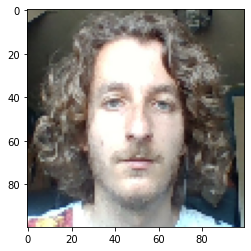

sem


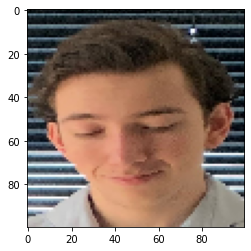

lars


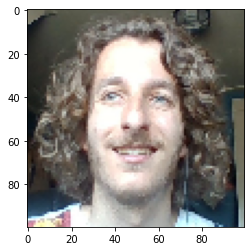

sem


In [34]:
dir_path = '../data/imgs/test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i,target_size=(100,100))
    plt.imshow(img)
    plt.show()
    
    X= image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images=np.vstack([X])
    
    predicted = model.predict(images)
    val = round(predicted[0][0])
    if (val == 0):
        print('lars')
    else:
        print('sem')
            
    